In [1]:
#meta 1/26/2021 Data Augmentation in CV - One Image
#Explore one image: open, view and manipulate images with PIL
#https://docs.fast.ai/vision.augment.html#RandomCrop


#reference
#fastai==2.1.8 with !pip freeze
#https://nbviewer.jupyter.org

#1/26/2021 Explore Data Augmentation with One Image
#      tried aug_transforms on one image, no success with fast.ai v2
#      refer to v1 https://github.com/anyaconda/my-fastai-project/blob/master/kaggle_resources/code_others/my-data-augmentation-in-fastai.ipynb

#here 2/6/2021 Data Augmentation in CV
#      Explore transforms on one image - works depending on image preparation


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import os
import time #to track performance time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#modeling
from fastai.vision.all import *
#from fastai.vision import *


# Input data files are available in the read-only "../input/" directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Augmentation in CV - One Image
## 0. Load Data
and basic info

In [3]:
path = Path('../input/cassava-leaf-disease-classification')
path.ls()

(#7) [Path('../input/cassava-leaf-disease-classification/train_tfrecords'),Path('../input/cassava-leaf-disease-classification/sample_submission.csv'),Path('../input/cassava-leaf-disease-classification/test_tfrecords'),Path('../input/cassava-leaf-disease-classification/label_num_to_disease_map.json'),Path('../input/cassava-leaf-disease-classification/train_images'),Path('../input/cassava-leaf-disease-classification/train.csv'),Path('../input/cassava-leaf-disease-classification/test_images')]

In [4]:
(path/'train_images').ls(), (path/'test_images').ls()

((#21397) [Path('../input/cassava-leaf-disease-classification/train_images/1235188286.jpg'),Path('../input/cassava-leaf-disease-classification/train_images/1215607589.jpg'),Path('../input/cassava-leaf-disease-classification/train_images/478554372.jpg'),Path('../input/cassava-leaf-disease-classification/train_images/2763304605.jpg'),Path('../input/cassava-leaf-disease-classification/train_images/2826122413.jpg'),Path('../input/cassava-leaf-disease-classification/train_images/111117998.jpg'),Path('../input/cassava-leaf-disease-classification/train_images/231268038.jpg'),Path('../input/cassava-leaf-disease-classification/train_images/4201965605.jpg'),Path('../input/cassava-leaf-disease-classification/train_images/3224710052.jpg'),Path('../input/cassava-leaf-disease-classification/train_images/1290729293.jpg')...],
 (#1) [Path('../input/cassava-leaf-disease-classification/test_images/2216849948.jpg')])

In [5]:
with open((path/'label_num_to_disease_map.json')) as json_file:
    target_map = json.load(json_file)
    
print(target_map)

{'0': 'Cassava Bacterial Blight (CBB)', '1': 'Cassava Brown Streak Disease (CBSD)', '2': 'Cassava Green Mottle (CGM)', '3': 'Cassava Mosaic Disease (CMD)', '4': 'Healthy'}


## 1. One Image - Shallow Dive

Using `Image` class from the Python Imaging Library `PIL` most widely used for opening, viewing and manipulatig images. Jupyter displays PIL images automatically. 

https://docs.fast.ai/vision.core.html

In [6]:
#define variables and functions

#view an image
img_example =  '251711364.jpg' #'100042118.jpg' 

#load train images
train_img = get_image_files(path/'train_images')
img_example2 = train_img[0] # '1235188286.jpg'

#only works with PIL Image
def get_ex(): return Image.open(path/'train_images'/img_example)

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

 Image.size `w*h`  
 Image.shape `h*w`, same order as numpy array and pytorch tensor
 
 - Prepare 3 PIL images

In [7]:
print(path/'train_images'/img_example)
img = Image.open(path/'train_images'/img_example) #PIL.JpegImagePlugin.JpegImageFile
print(img.mode, img.layers, img.size, img.shape) #size w*h, shape h*w


../input/cassava-leaf-disease-classification/train_images/251711364.jpg
RGB 3 (800, 600) (600, 800)


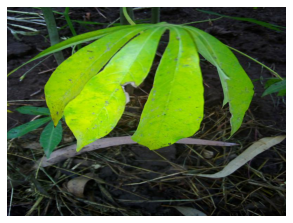

In [8]:
#view image 1 - full image
#img

show_image(img)

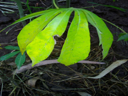

In [9]:
img.to_thumb(128)

../input/cassava-leaf-disease-classification/train_images/1235188286.jpg
RGB 3 (800, 600) (600, 800)


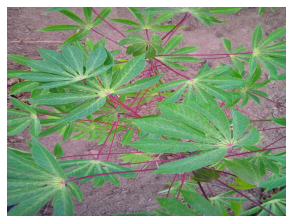

In [10]:
#view image 2
print(img_example2)
img2 = Image.open(img_example2) #class PIL.JpegImagePlugin.JpegImageFile
print(img2.mode, img2.layers, img2.size, img2.shape)

show_image(img2)

<class 'PIL.Image.Image'>
RGB (600, 400) (400, 600)


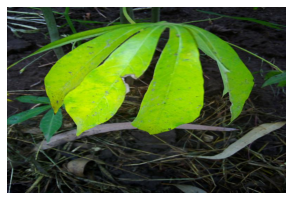

In [11]:
#prepare and view image 3
img3 = img.resize((600,400)) #class (PIL.Image.Image, (400, 600))
print(img3.__class__) 
print(img3.mode, img3.size, img3.shape)

show_image(img3)

In [12]:
img.n_px, img2.n_px, img3.n_px

(480000, 480000, 240000)

To a computer, everything is represented by numbers. To see the numbers that make up the image, convert it to a `Numpy array` or `PyTorch` tensor.  
`h*w*c` dims order

In [13]:
print (array(img).shape) # h*w*c
#numpy indexes from top to bottom, from L to R -> bottom right corner of the image
array(img)[595:600, 798:800, :] #5 rows of 2 columns and all 3 channels

(600, 800, 3)


array([[[ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  5,  3],
        [ 4,  4,  2]],

       [[13, 13, 11],
        [11, 11,  9]],

       [[19, 19, 17],
        [17, 17, 15]]], dtype=uint8)

In [14]:
print(tensor(img).shape)
tensor(img)[595:600, 798:800, :]

torch.Size([600, 800, 3])


tensor([[[ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 5,  5,  3],
         [ 4,  4,  2]],

        [[13, 13, 11],
         [11, 11,  9]],

        [[19, 19, 17],
         [17, 17, 15]]], dtype=torch.uint8)

Option (not used): Transform image to byte tensor in `c*h*w` dim order.

In [15]:
img_tensor = image2tensor(img) #cxhxd
print(img_tensor.shape)
img_tensor

torch.Size([3, 600, 800])


tensor([[[13, 15, 14,  ..., 21, 21, 21],
         [15, 19, 29,  ..., 20, 21, 21],
         [35, 50, 70,  ..., 20, 21, 22],
         ...,
         [23, 22, 25,  ...,  6,  5,  4],
         [19, 15, 24,  ..., 14, 13, 11],
         [19, 15, 28,  ..., 19, 19, 17]],

        [[10, 14, 14,  ..., 16, 16, 16],
         [12, 16, 30,  ..., 15, 16, 16],
         [30, 48, 70,  ..., 18, 19, 20],
         ...,
         [24, 23, 30,  ...,  6,  5,  4],
         [20, 16, 29,  ..., 14, 13, 11],
         [20, 16, 33,  ..., 19, 19, 17]],

        [[19, 22, 22,  ..., 20, 20, 20],
         [19, 23, 35,  ..., 19, 20, 20],
         [34, 51, 72,  ..., 21, 22, 23],
         ...,
         [45, 44, 50,  ...,  4,  3,  2],
         [41, 37, 49,  ..., 12, 11,  9],
         [41, 37, 53,  ..., 17, 17, 15]]], dtype=torch.uint8)

### 1.1 Basic Image operations
- Properties
- Reshape and Resize

In [16]:
type(img),img.mode, str(img)

(PIL.JpegImagePlugin.JpegImageFile,
 'RGB',
 '<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600 at 0x7F8A724B3E50>')

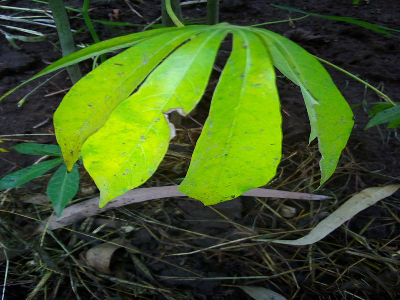

In [17]:
img_reshaped = img.reshape(300, 400)
img_reshaped

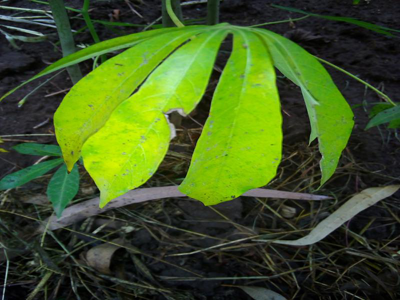

In [18]:
img_resized = img.resize((400,300))
img_resized

In [19]:
#no effect on img
#img
img.n_px, img_reshaped.n_px, img_resized.n_px

(480000, 120000, 120000)

### 1.2 Basic Transforms
https://docs.fast.ai/vision.core.html#Basic-Transforms

In [20]:
tfm = ToTensor()
print(tfm)
print('\n', type(img)) # same as __class__
print('\n', type(tfm(img))) # same as __class__

ToTensor:
encodes: (PILMask,object) -> encodes
(PILBase,object) -> encodes
decodes: 

 <class 'PIL.JpegImagePlugin.JpegImageFile'>

 <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [21]:
#if True => no assertion error
test_eq(tfm(img).shape, (600,800))

## 2. Data Augmentation in CV

### 2.1 Resize with Crop
- Center Crop
https://docs.fast.ai/vision.augment.html#CropPad

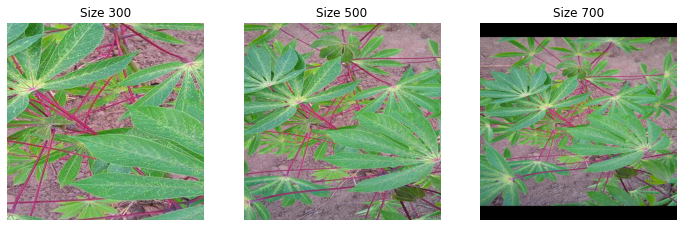

In [22]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,sz in zip(axs.flatten(), [300, 500, 700]):
    show_image(img2.crop_pad(sz), ctx=ax, title=f'Size {sz}');

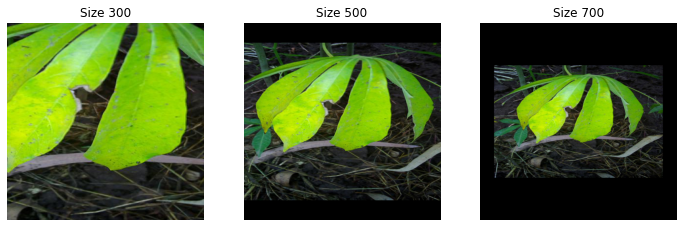

In [23]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,sz in zip(axs.flatten(), [300, 500, 700]):
    show_image(img3.crop_pad(sz), ctx=ax, title=f'Size {sz}');

### 2.1a Crop, Diff Pad Modes
https://docs.fast.ai/vision.augment#aug_transforms

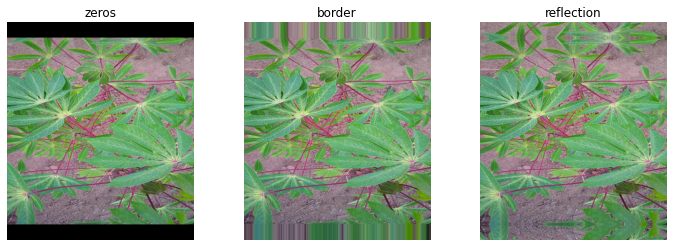

In [24]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,mode in zip(axs.flatten(), [PadMode.Zeros, PadMode.Border, PadMode.Reflection]):
    show_image(img2.crop_pad((600,700), pad_mode=mode), ctx=ax, title=mode);

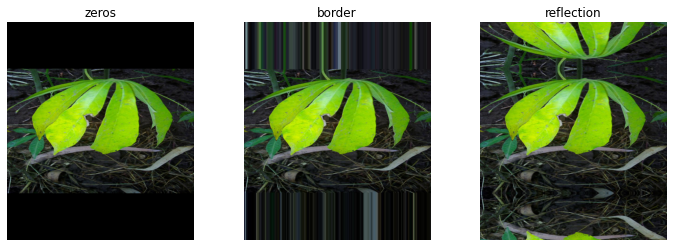

In [25]:
_,axs = plt.subplots(1,3,figsize=(12,4))
for ax,mode in zip(axs.flatten(), [PadMode.Zeros, PadMode.Border, PadMode.Reflection]):
    show_image(img3.crop_pad((600,700), pad_mode=mode), ctx=ax, title=mode);

- Random Crop

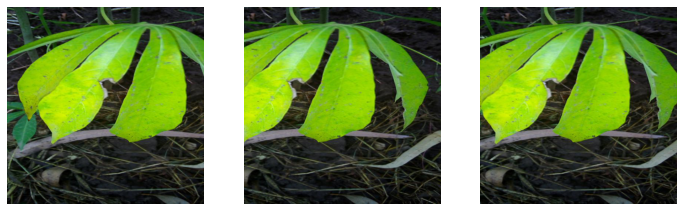

In [26]:
#Randomly crop an image to size - $mynote: works with img3, not img, not img2
_,axs = plt.subplots(1,3,figsize=(12,4))
f = RandomCrop(400)
for ax in axs: show_image(f(img3), ctx=ax);

- Random Resized Crop

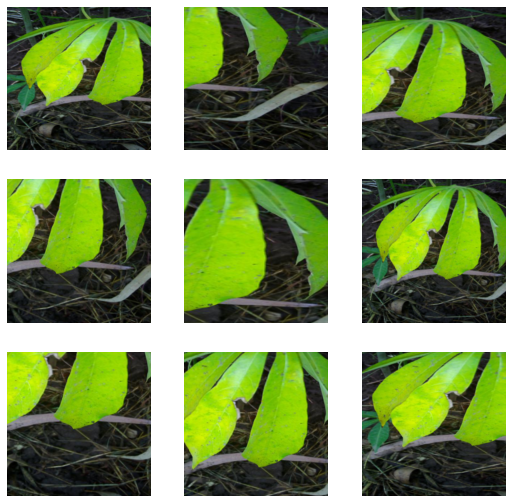

In [27]:
#Picks a random scaled crop of an image and resize it - $mynote: works with img3, not img, not img2
crop = RandomResizedCrop(256)
_,axs = plt.subplots(3,3,figsize=(9,9))
for ax in axs.flatten():
    cropped = crop(img3)
    show_image(cropped, ctx=ax);

### 2.2 Prep Image for Transforms

In [28]:
timg = TensorImage(array(img)).permute(2,0,1).float()/255. 
#class Tensor image, shape c*h*w
print(timg.shape)
img.__class__, timg.__class__

(3, 600, 800)


(PIL.JpegImagePlugin.JpegImageFile, fastai.torch_core.TensorImage)

In [29]:
def _batch_ex(bs): return TensorImage(timg[None].expand(bs, *timg.shape).clone())

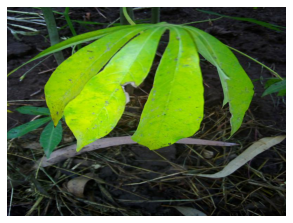

In [30]:
#look the same
#show_image(img)
show_image(timg)

- Random Resized Crop GPU

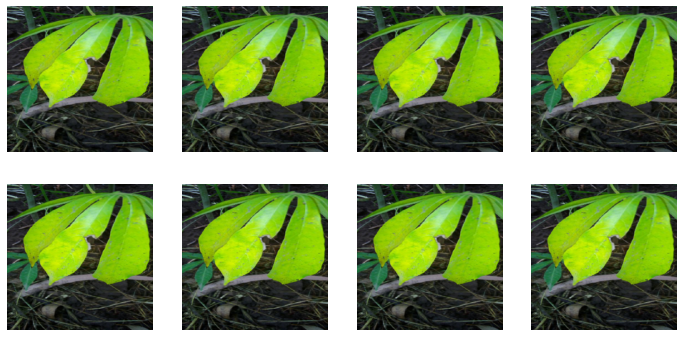

In [31]:
t = _batch_ex(8)
rrc = RandomResizedCropGPU(256, p=1.)
y = rrc(t)
_,axs = plt.subplots(2,4, figsize=(12,6))
for ax in axs.flatten():
    show_image(y[0], ctx=ax)

### 2.3 Item Transforms
- Flip randomly with probability p

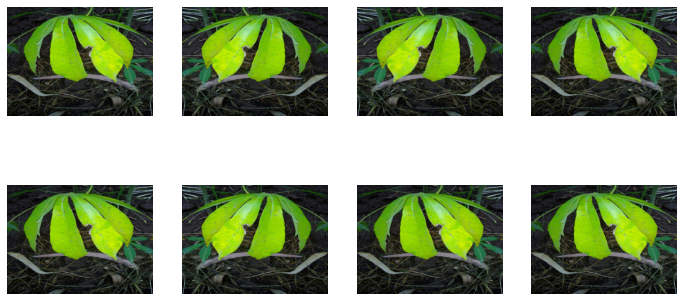

In [32]:
_,axs = subplots(2, 4)
for ax in axs.flatten():
    show_image(FlipItem(p=0.5)(timg, split_idx=0), ctx=ax)

- Dihedral

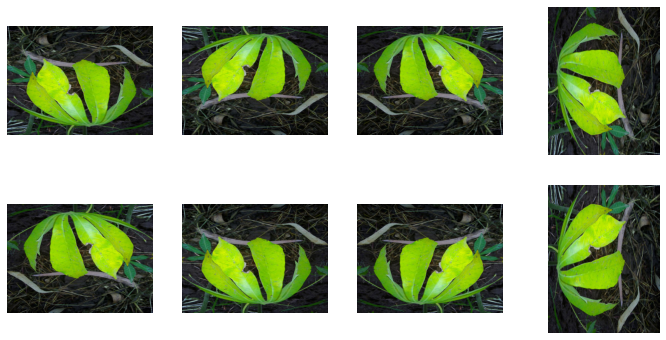

In [33]:
_,axs = subplots(2, 4)
for ax in axs.flatten():
    show_image(DihedralItem(p=1.)(timg, split_idx=0), ctx=ax)

### 2.4 More Transforms
- Zoom

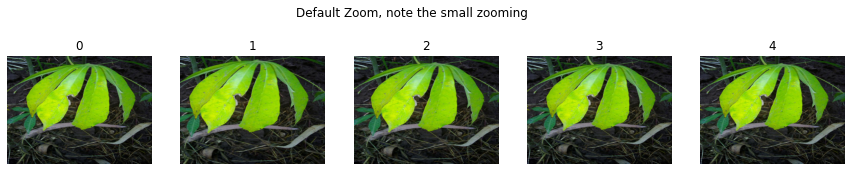

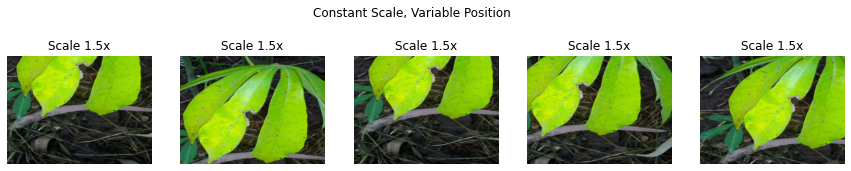

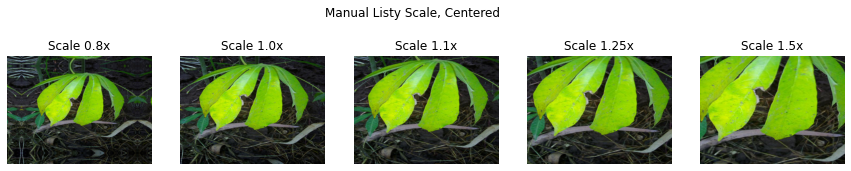

In [34]:
with no_random():
    scales = [0.8, 1., 1.1, 1.25, 1.5]
    imgs = _batch_ex(5)
    deflt = Zoom()
    funct = Zoom(draw=lambda x: x.new_empty(x.size(0)).uniform_(1., 1.1)) #same as default
    const = Zoom(p=1., draw=1.5) #'Constant scale and different random centers'
    listy = Zoom(p=1.,draw=scales,draw_x=0.5, draw_y=0.5) #completely manual scales, constant center
    
    show_images( deflt(imgs) ,suptitle='Default Zoom, note the small zooming', titles=[i for i in range(imgs.size(0))])
    show_images( const(imgs) ,suptitle='Constant Scale, Variable Position', titles=[f'Scale 1.5x' for i in range(imgs.size(0))])
    show_images( listy(imgs) ,suptitle='Manual Listy Scale, Centered', titles=[f'Scale {i}x' for i in scales])
    #show_images( funct(imgs) ,suptitle='Default Functional Zoom', titles=[i for i in range(imgs.size(0))]) #same as default

- Warp

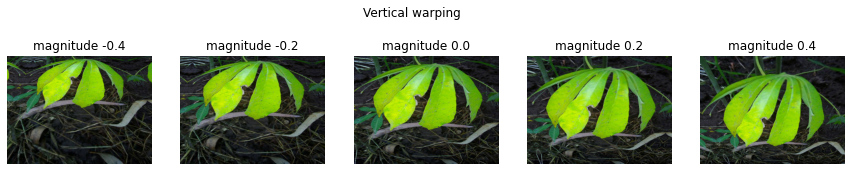

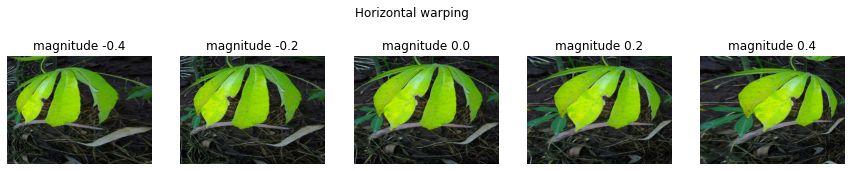

In [35]:
scales = [-0.4, -0.2, 0., 0.2, 0.4]
imgs=_batch_ex(5)
vert_warp = Warp(p=1., draw_y=scales, draw_x=0.)
horz_warp = Warp(p=1., draw_x=scales, draw_y=0.)
show_images( vert_warp(imgs) ,suptitle='Vertical warping', titles=[f'magnitude {i}' for i in scales])
show_images( horz_warp(imgs) ,suptitle='Horizontal warping', titles=[f'magnitude {i}' for i in scales])

- Contrast

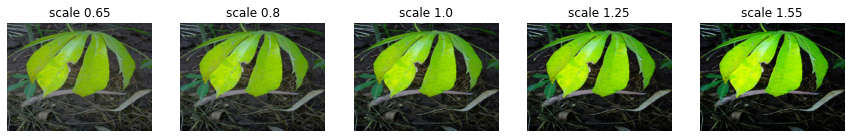

In [36]:
scales = [0.65, 0.8, 1., 1.25, 1.55]
y = _batch_ex(5).contrast(p=1., draw=scales)
fig,axs = plt.subplots(1,5, figsize=(15,3))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax, title=f'scale {scales[i]}')

- Brightness

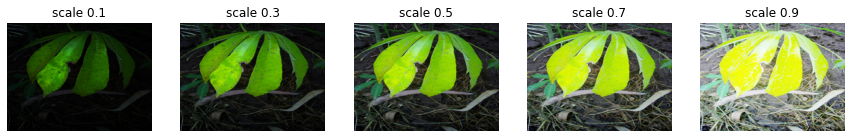

In [37]:
scales = [0.1, 0.3, 0.5, 0.7, 0.9]
y = _batch_ex(5).brightness(draw=scales, p=1.)
fig,axs = plt.subplots(1,5, figsize=(15,3))
for i,ax in enumerate(axs.flatten()):
    show_image(y[i], ctx=ax, title=f'scale {scales[i]}')

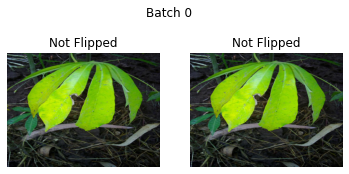

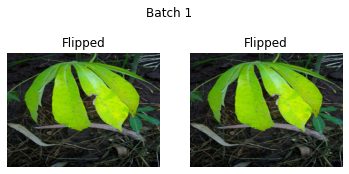

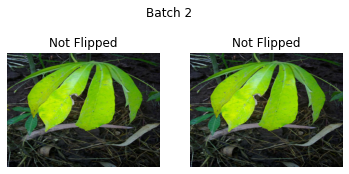

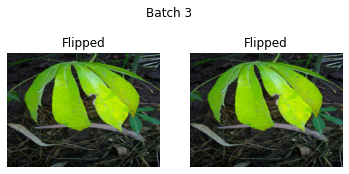

In [38]:
dih = DeterministicFlip({'p':.3})

b = _batch_ex(2)
dih = DeterministicFlip()
for i,flipped in enumerate(['Not Flipped','Flipped']*2):
    show_images(dih(b),suptitle=f'Batch {i}',titles=[flipped]*2)


### 2.5 Aug Transforms
All together

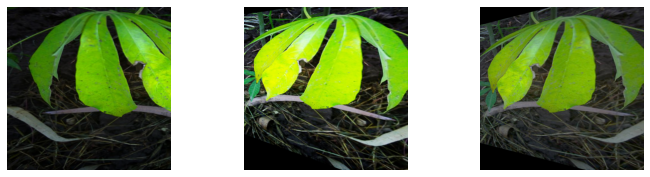

In [39]:
tfms = aug_transforms(pad_mode='zeros', mult=2, min_scale=0.5)
y = _batch_ex(9)
for t in tfms: y = t(y, split_idx=0)
_,axs = plt.subplots(1,3, figsize=(12,3))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)

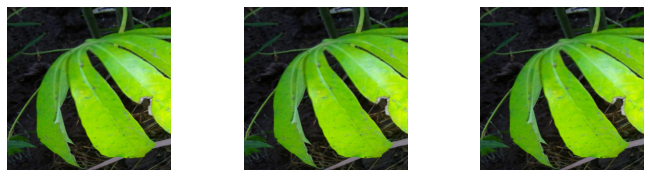

In [50]:
tfms = aug_transforms( mult=2, min_scale=0.5, batch=True) #default pad_mode='reflection'
y = _batch_ex(9)
for t in tfms: y = t(y, split_idx=0)
_,axs = plt.subplots(1,3, figsize=(12,3))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)

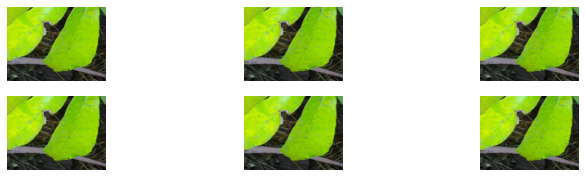

In [51]:
#combine transforms
tfms = [Rotate(draw=10., p=1), Zoom(draw=2.0, draw_x=0.5, draw_y=0.5, p=1.)]

y = _batch_ex(9)
for t in tfms: y = t(y, split_idx=0)
_,axs = plt.subplots(2,3, figsize=(12,3))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)


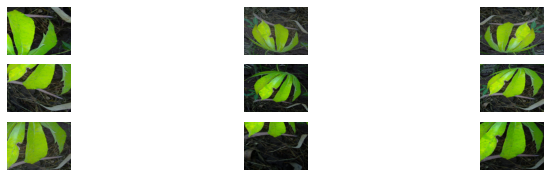

In [42]:
#try this for cassava competition
tfms = aug_transforms(flip_vert = True, mult=2, max_zoom = 2.0)

y = _batch_ex(9)
for t in tfms: y = t(y, split_idx=0)
_,axs = plt.subplots(3,3, figsize=(12,3))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)


## 3. Transform Definitions 

In [55]:
len(tfms)
tfms

[Rotate -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0}:
 encodes: (TensorImage,object) -> encodes
 (TensorMask,object) -> encodes
 (TensorBBox,object) -> encodes
 (TensorPoint,object) -> encodes
 decodes: ,
 Zoom -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0}:
 encodes: (TensorImage,object) -> encodes
 (TensorMask,object) -> encodes
 (TensorBBox,object) -> encodes
 (TensorPoint,object) -> encodes
 decodes: ]